<a href="https://colab.research.google.com/github/mayenkalu/regression_ml_stage_b/blob/main/regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [1]:
#installing dependencies and requirements
!pip install pandas openpyxl

In [3]:
#importing file from my local machine
from google.colab import files
uploaded = files.upload()

Saving ENB2012_data.xlsx to ENB2012_data (1).xlsx


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_excel('ENB2012_data.xlsx', engine = 'openpyxl')

In [7]:
print(df)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


In [8]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2':'Surface_Area', 'X3':'Wall_Area',
'X4':'Roof_Area', 'X5':'Overall_Height', 'X6':'Orientation', 'X7':'Glazing_Area', 'X8':'Glazing_Area_Distribution',
'Y1':'Heating_Load', 'Y2':'Cooling_Load'}

df = df.rename(columns=column_names)

In [9]:
print(df)

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Orientation  Glazing_A

In [10]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

In [11]:
print(simple_linear_reg_df)

     Relative_Compactness  Cooling_Load
158                  0.82         25.35
251                  0.86         31.28
631                  0.90         33.31
757                  0.66         17.79
689                  0.79         47.59
573                  0.62         17.21
553                  0.74         17.25
728                  0.86         29.69
183                  0.66         13.83
515                  0.69         14.60
460                  0.71         14.67
143                  0.62         14.24
258                  0.79         43.14
682                  0.86         36.21
62                   0.82         24.61


<Axes: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

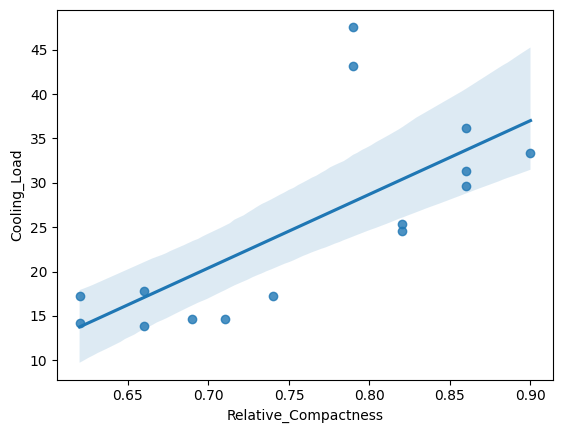

In [12]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

# Multiple Linear Regression


## Measuring Regression Performance
### MAE, RSS, RMSE

In [13]:
#first is to normalise the dataset to a common scale using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']
print(normalised_df)
print(features_df)
print(heating_target)

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                1.000000      0.000000   0.285714   0.000000             1.0   
1                1.000000      0.000000   0.285714   0.000000             1.0   
2                1.000000      0.000000   0.285714   0.000000             1.0   
3                1.000000      0.000000   0.285714   0.000000             1.0   
4                0.777778      0.166667   0.428571   0.111111             1.0   
..                    ...           ...        ...        ...             ...   
763              0.055556      0.916667   0.571429   1.000000             0.0   
764              0.000000      1.000000   0.714286   1.000000             0.0   
765              0.000000      1.000000   0.714286   1.000000             0.0   
766              0.000000      1.000000   0.714286   1.000000             0.0   
767              0.000000      1.000000   0.714286   1.000000             0.0   

     Orientation  Glazing_A

In [14]:
#now is to split the dataset into two - training and testing dataset
#note, what was done earlier was to segment the features and target variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
                                                    test_size=0.3, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model into the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [16]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [17]:
#Residual Sum of Squares (RSS)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [18]:
#R-squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

# Penalization Methods

#####These methods are used to make a complex model simple by regularising the coefficients to reduce their magnitude and variance so as to reduce overfitting of a model.
#####The Ridge Regression, L2 regularisation, shrinks coefficients towards zero without eliminating them. It include square of the coefficients to loss function.
#####The Lasso Regression, L1 regularisation, selects significant features that contribute to predicting the response variable and shrinks them, eliminating others. Thereby reducing predication errors. Its limitation is eliminating features that strong contribute to other factors.
#####Elastic Net combines L1 and L2, simulatneously selecting optimal values and performs shrinkage to overcome L2 limitation

In [19]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [20]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [21]:
#comparing the effects of the regularization
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [22]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [23]:
print(final_weights)

                    Features  Linear_Model_Weight  Ridge_Weight  Lasso_Weight
0               Surface_Area        -5.966585e+12     -0.062275      0.000000
1       Relative_Compactness        -6.064125e-01     -0.283471     -0.027719
2                Orientation        -3.150940e-03      0.003369      0.000000
3  Glazing_Area_Distribution         1.922846e-02      0.029088      0.021431
4               Glazing_Area         2.289743e-01      0.212449      0.206132
5             Overall_Height         3.862305e-01      0.442467      0.463482
6                  Wall_Area         3.480508e+12      0.103061      0.200087
7                  Roof_Area         4.474939e+12     -0.163192     -0.000000
